## Problem Statement 

🎉🎉 Attention all student data whizzes! We are beyond excited to kick off the "Data Science Student Championship 2023". This year's challenge? A real head-turner: Predicting the 'total_fare' for taxi rides! 🚖

 

As a student, you've undoubtedly hailed a ride when you're late for class or heading out for a late-night study session. Ever wondered how the total cost of your ride is determined? Well, it's time to switch gears from passenger to predictor. In this thrilling hackathon, you'll put your data science skills to the ultimate test by predicting the total fare of a ride-hailing trip. 🎯

 

This championship is designed not just to put your skills under the microscope, but to refine them, strengthen them, and prepare you for real-world problem-solving scenarios. And that's not all! You'll be delving into a fundamental issue in the world of transportation economics.

## MetaData

* ⏱️ 'trip_duration': How long did the journey last? [in Seconds]
* 🛣️ 'distance_traveled': How far did the taxi travel? [in Km]
* 🧑 'num_of_passengers': How many passengers were in the taxi?
* 💵 'fare': What's the base fare for the journey?
* 💲 'tip': How much did the driver receive in tips?
* 🎀 'miscellaneous_fees': Were there any additional charges during the trip?
* 💰 'total_fare': The grand total for the ride (this is your prediction target!).
* ⚡ 'surge_applied': Was there a surge pricing applied? Yes or no?

In [5]:
# Importing the required libraries 

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
# Check the shape of the Data  
train.shape, test.shape

((209673, 8), (89861, 8))

In [8]:
# Preview train and test both 

In [9]:
train.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [11]:
# test has n-1 columns where n is the total number of columns in the dataset 
test.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,0,0,13.500,0,0
1,429.0,1.48,4.0,0,0,13.500,0,0
2,856.0,4.15,1.0,0,24,6.000,0,0
3,622.0,3.22,1.0,0,15,5.625,0,0
4,507.0,3.98,1.0,0,0,2.250,0,0


In [12]:
test.fare.describe()

count    89861.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: fare, dtype: float64

**Inference: relation is fare + tip + misc_fee = Total_fare

### Exploratory Data Analysis 

* Univariate Analysis 
* Bi variate Analysis
* Missing Values 
* Outlier Identification 
* Feature Engineering 
* Statistical Analysis 
* Scaling/Transformation

At this stage the data is ready for modelling 

### Model Building 

* Base models - Linear Regression, Decision Tree, Random Forest, Gradient Boosting Machine, Xtreme Gradient Boosting, Catboost regressor, LightGBM.

Keep submitting the model output and see which model gives you the lowest RMSE possible. 

* Once you know which model(s) have returned the lowest possible RMSE, then you can combine those models and build an ensemble on that.

like for e.g. you found that `Random Forest & Gradient Boosting` gave the lowest possible RMSE, you take those models and put it in **VotingRegressor Function**. This voting regressor will generate the output for both the models and will take the average of both the prediction and will generate the final prediction...

* `Cross validation Models` - Take KFold validation for instance and you build all the models using cross validation. Remember train test split is a basic way of building models. we always do the cross validation so that we can say that the prediction are accurate 

* In order to maximise the performance of these models, you have to do the **Parameter Tuning of these models.**


### ML OPs - Deployement of the Machine Learning Model...

Machine learning operatuons are generally the segment in ML that is used to Deploy these application in the real world. for example you are building a taxi fare prediction model. You will take this inference and calculation done to put this in real world through mobile-app enabling customers finding the fare price with transparency using A.I.

Some of the very popular platforms for deployement of Ml models - streamlitm Heroku, ( Django and Flask ) apart from cloud which is AWS or Azure etc...

**Note and area of brainstorming - Connecting the SQL with Python...**


In [13]:
# Combine the train and test set 

combined = pd.concat([train,test],ignore_index=True)

In [14]:
combined.shape

(299534, 8)

In [20]:
# Lets do the EDA, filter the data 
combined.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [21]:
combined.select_dtypes(include=np.number).columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [22]:
num_vars = ['trip_duration', 'distance_traveled', 'fare', 'tip', 'miscellaneous_fees', 'total_fare']
cat_vars = ['num_of_passengers', 'surge_applied']

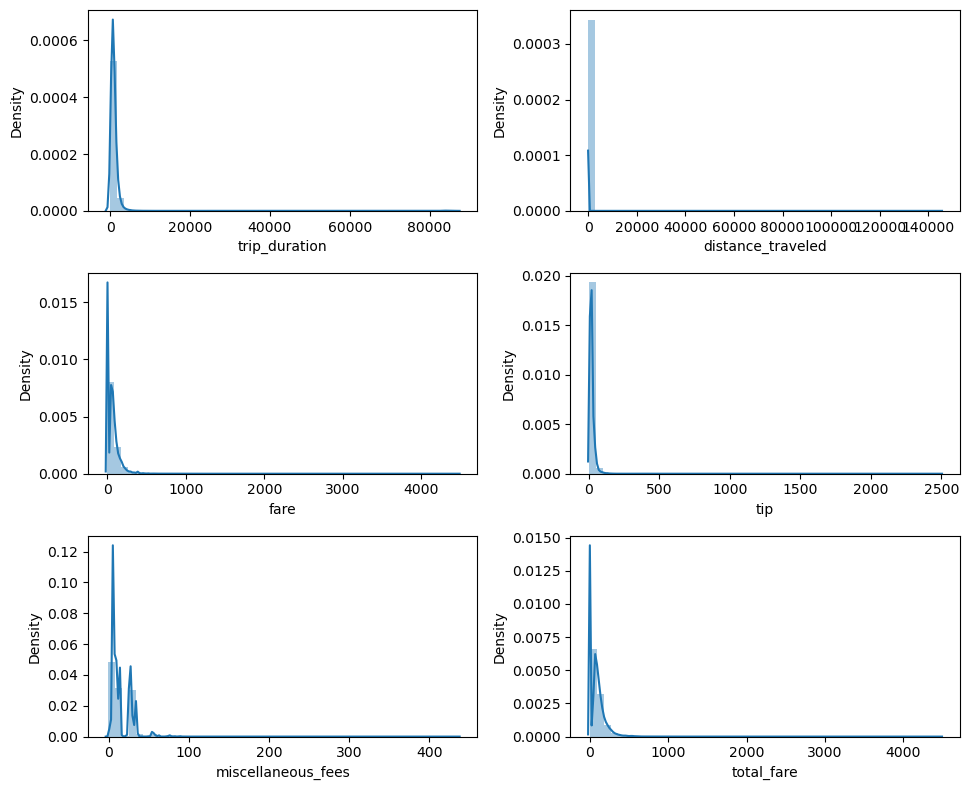

In [28]:
# Num_vars -  Distplot 
nrows = 3 # number of rows for the plot area
ncols = 2 # number of columns for the plot area 
iterator = 1  # ro initiate the plot using the loop. Default counter is 1 ... 
plt.figure(figsize=(10,8))
for i in num_vars:
    plt.subplot(nrows,ncols,iterator) # plot dimensions 
    sns.distplot(combined.loc[:,i])
    iterator+=1
plt.tight_layout()
plt.show()

Inference:

*  Since the numerical variable comprises of fare and additional charges along with the tip, the data is bound to be naturally positively skewed 

* Also the distance travelled can be min 0 but cant' be negative and thus, we see that there is a positively skewed pattern in the data.

what exactly it means 


It simply means, a lot of people are paying higher prices for the distance they travel 

Note : Time in seconds show 0 which is not possible. Therefore we need to fix this pattern too


we also notice that trip duration, num_of_passengers and fare is 0 . we need to analyse this data separately

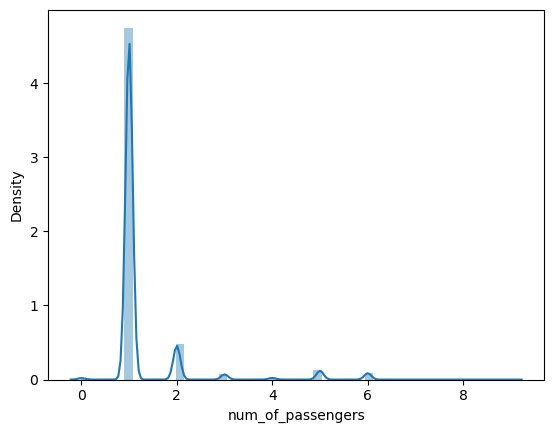

In [29]:
sns.distplot(combined.num_of_passengers)
plt.show()

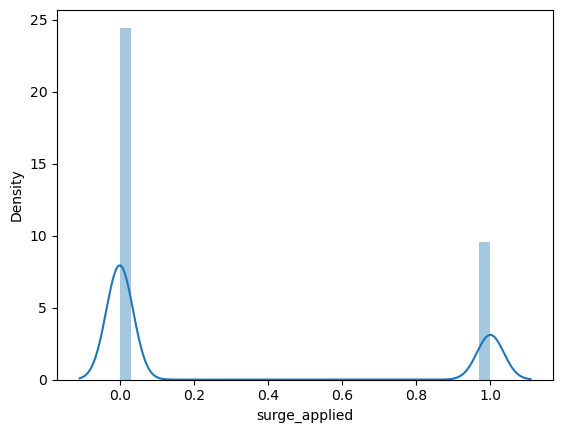

In [31]:
sns.distplot(combined.surge_applied)
plt.show()

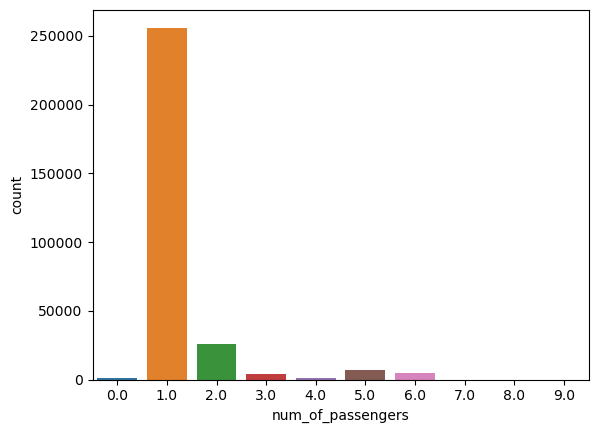

In [32]:
# No_of_passengers 
sns.countplot(combined.num_of_passengers)
plt.show()

In [33]:
combined.num_of_passengers.value_counts()

1.0    256094
2.0     25601
5.0      6642
6.0      4806
3.0      3925
4.0      1281
0.0      1129
8.0        39
9.0        11
7.0         6
Name: num_of_passengers, dtype: int64

In [34]:
# what about fare where num of passengers is 0 

combined.loc[(train.num_of_passengers==0)&(combined.fare==0)]

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
17190,56.0,1.29,0.0,0.0,0,0.00,0.00,0
36846,1600.0,4.18,0.0,0.0,0,0.00,0.00,0
75581,45.0,0.16,0.0,0.0,0,0.00,0.00,0
89187,1679.0,9.98,0.0,0.0,0,3.75,3.75,0
126357,86.0,1.45,0.0,0.0,0,0.00,0.00,0
157026,1386.0,6.92,0.0,0.0,0,0.00,0.00,0
169598,78.0,0.64,0.0,0.0,0,0.00,0.00,0
170282,87.0,11.10,0.0,0.0,0,0.00,0.00,0
208707,2443.0,6.92,0.0,0.0,0,0.00,0.00,0


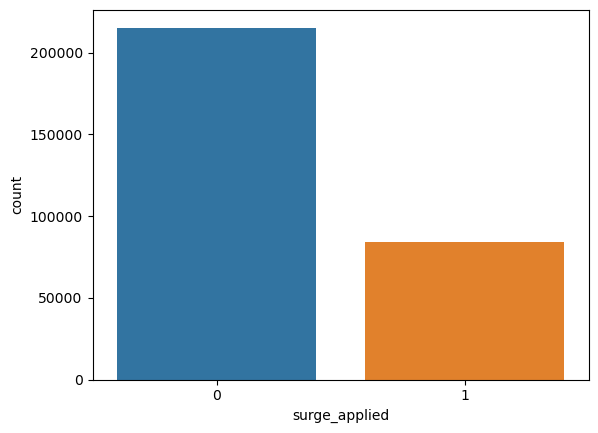

In [35]:
sns.countplot(combined.surge_applied)
plt.show()

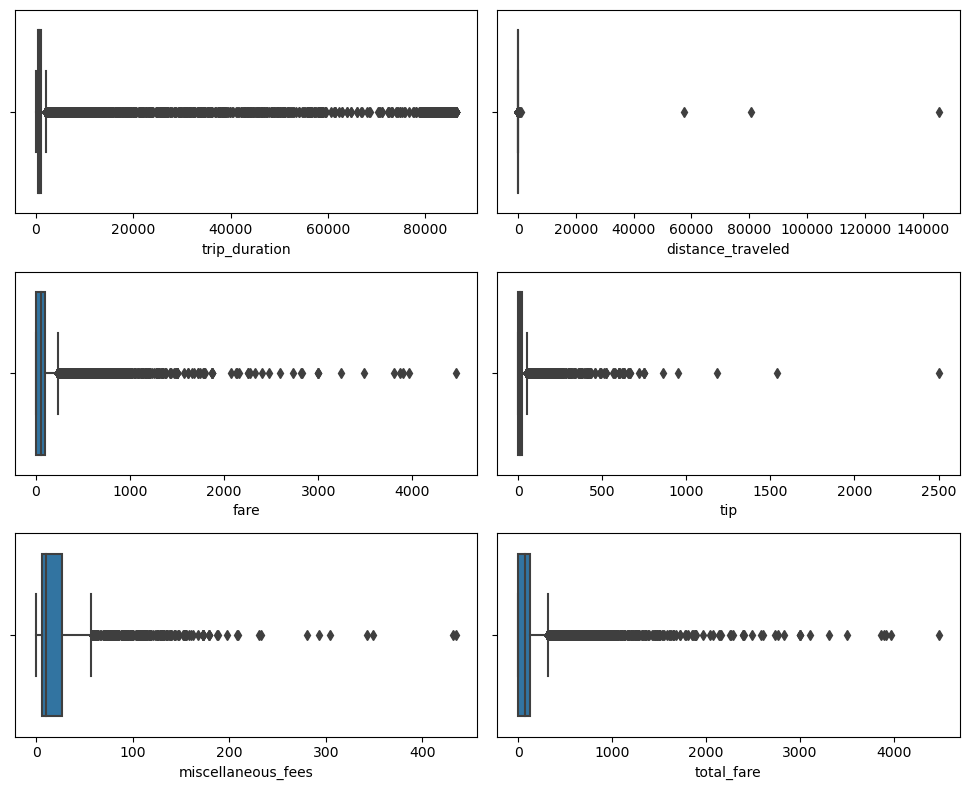

In [36]:
# lets find the outliers in the data 

# Num_vars -  boxplot 
nrows = 3 # number of rows for the plot area
ncols = 2 # number of columns for the plot area 
iterator = 1  # ro initiate the plot using the loop. Default counter is 1 ... 
plt.figure(figsize=(10,8))
for i in num_vars:
    plt.subplot(nrows,ncols,iterator) # plot dimensions 
    sns.boxplot(combined.loc[:,i])
    iterator+=1
plt.tight_layout()
plt.show()



### Bivariate Analysis 

* num Vs num  - Scatterplot
* Cat vs Num - Boxplot/Violinplot

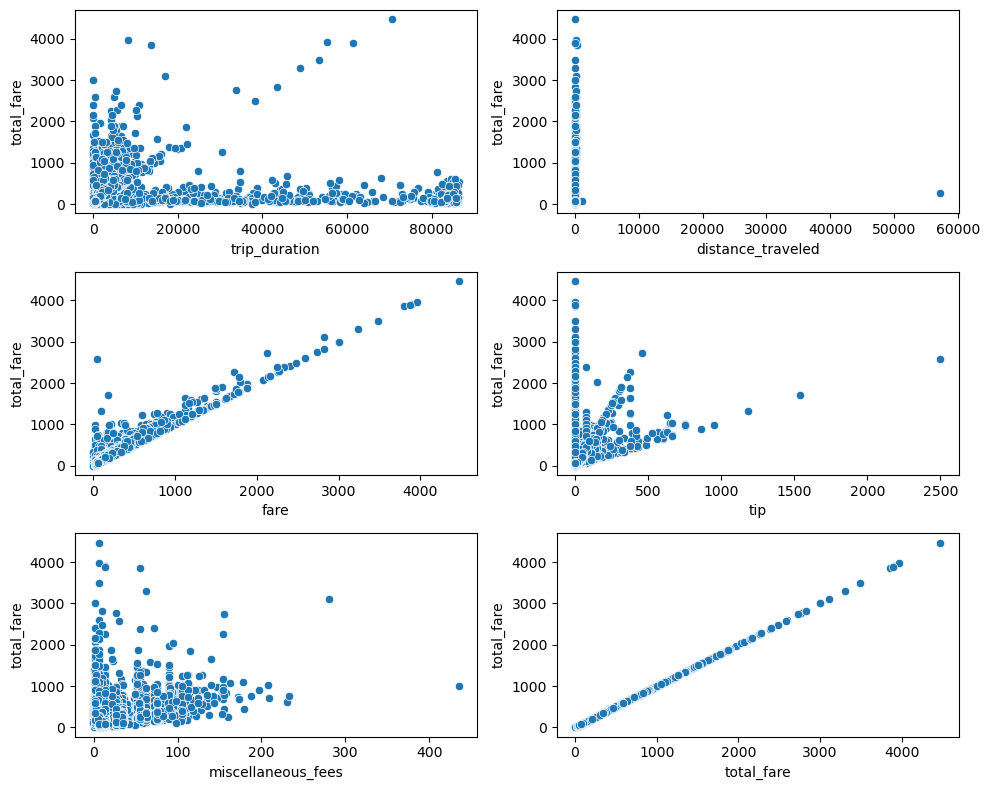

In [37]:
# Bivariate : Num vs Num 

nrows = 3 # number of rows for the plot area
ncols = 2 # number of columns for the plot area 
iterator = 1  # ro initiate the plot using the loop. Default counter is 1 ... 
plt.figure(figsize=(10,8))
for i in num_vars:
    plt.subplot(nrows,ncols,iterator) # plot dimensions 
    sns.scatterplot(combined.loc[:,i],train.total_fare)
    iterator+=1
plt.tight_layout()
plt.show()



<AxesSubplot:xlabel='num_of_passengers', ylabel='total_fare'>

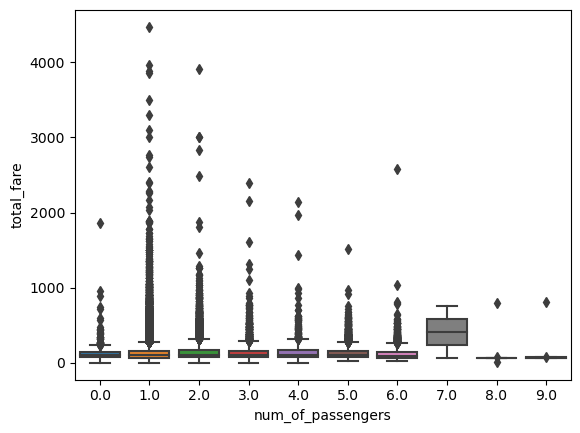

In [38]:
# Boxplot for cat vs num 

sns.boxplot(x = 'num_of_passengers', y = 'total_fare',data=train)

In [70]:
# Lets bin the num of passengers basis the total fare 

def passengers(x):
    if x<=4:
        return('cab')
    elif x <=6:
        return('SUV')
    else:
        return('Tempo_Traveller')

In [71]:
train['passenger_cat'] = train.num_of_passengers.apply(passengers)
test['passenger_cat'] = test.num_of_passengers.apply(passengers)

<AxesSubplot:xlabel='passenger_cat', ylabel='fare'>

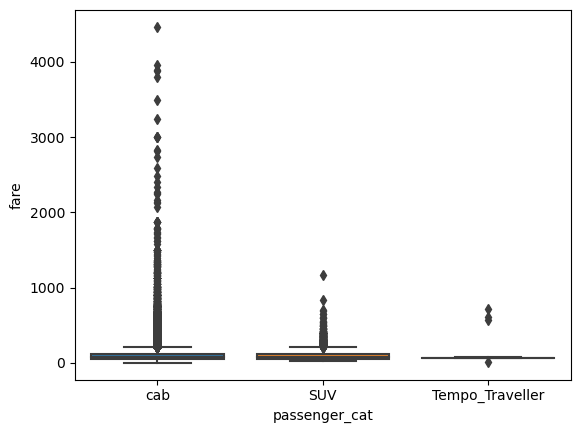

In [72]:
sns.boxplot(x='passenger_cat',y='fare',data=train)

In [39]:
train.num_of_passengers.value_counts()

1.0    179229
2.0     17896
5.0      4713
6.0      3382
3.0      2757
4.0       908
0.0       753
8.0        25
9.0         8
7.0         2
Name: num_of_passengers, dtype: int64

<AxesSubplot:xlabel='surge_applied', ylabel='total_fare'>

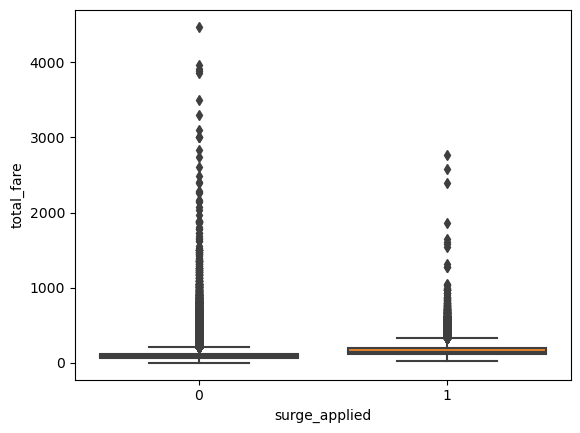

In [41]:
# Surge Vs total fair 

sns.boxplot(x='surge_applied', y='total_fare',data=train)

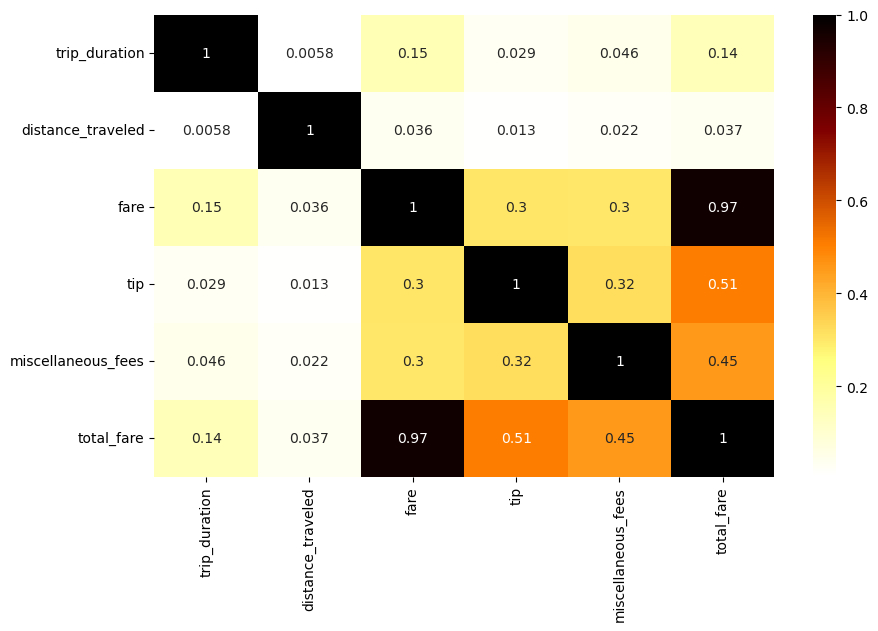

In [42]:
# Correlation plot
plt.figure(figsize=(10,6))
sns.heatmap(train.loc[:,num_vars].corr(),annot=True,cmap='afmhot_r')
plt.show()

### Inference of correlation Heatmap 
* We notice that there is no strong correlation between the predictors and the target
* Fare has very weak correlation with distance travelled and the trip duration 

In [43]:
# Missing values in the data

combined.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

### Outlier removal 


* Boxplot IQR technique and check the correlation  
* Winsorization & check the correlation 

Note : The boxplot technique is applied only on train Dataset. Wherein the winsorization can be applied on train and test combined.

In [73]:
# IQR method 

q1 = train.quantile(0.25)
q3 = train.quantile(0.75)
iqr = q3-q1
upper_lim = q3+1.5*iqr
lower_lim = q1-1.5*iqr

In [74]:
# Remove the outliers from the data 

wt_outliers = train.loc[~((train<lower_lim)|(train>upper_lim)).any(axis=1)]

In [75]:
train.shape[0]-158838

50835

In [49]:
test.shape

(89861, 8)

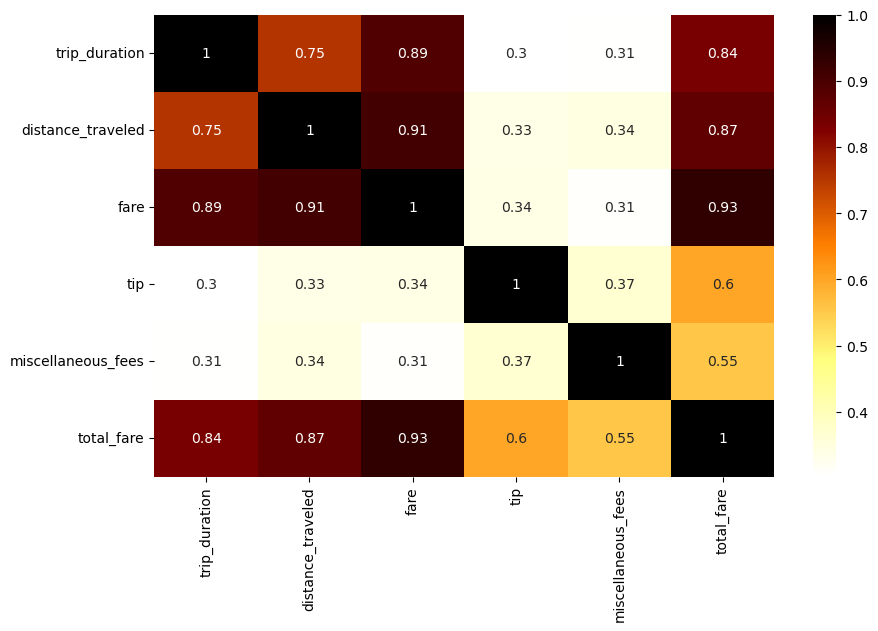

In [76]:
# check the correlation for without outliers now 

# Correlation plot
plt.figure(figsize=(10,6))
sns.heatmap(wt_outliers.loc[:,num_vars].corr(),annot=True,cmap='afmhot_r')
plt.show()

**If the data has lots of outliers and the correlation is very weak with the target. One must remove the outliers because it might improve the correlation with the target massively** 


### Winsorisation 

* It is a concept where we cap the values. Capping the values means that the outliers will be capped/maxed let say 0.95. It looks like training of the data from the top and bottom selectively 


In [77]:
# Apply winsorisation 

from scipy.stats.mstats import winsorize # input array, limit percent for cutting the data

new = combined.copy()
for i in combined.columns:
    winsorized_data = winsorize(a = new.loc[:,i],limits=(0.01,0.01))
    new[i+'_winsorized'] = winsorized_data

In [78]:
new.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied',
       'trip_duration_winsorized', 'distance_traveled_winsorized',
       'num_of_passengers_winsorized', 'fare_winsorized', 'tip_winsorized',
       'miscellaneous_fees_winsorized', 'total_fare_winsorized',
       'surge_applied_winsorized'],
      dtype='object')

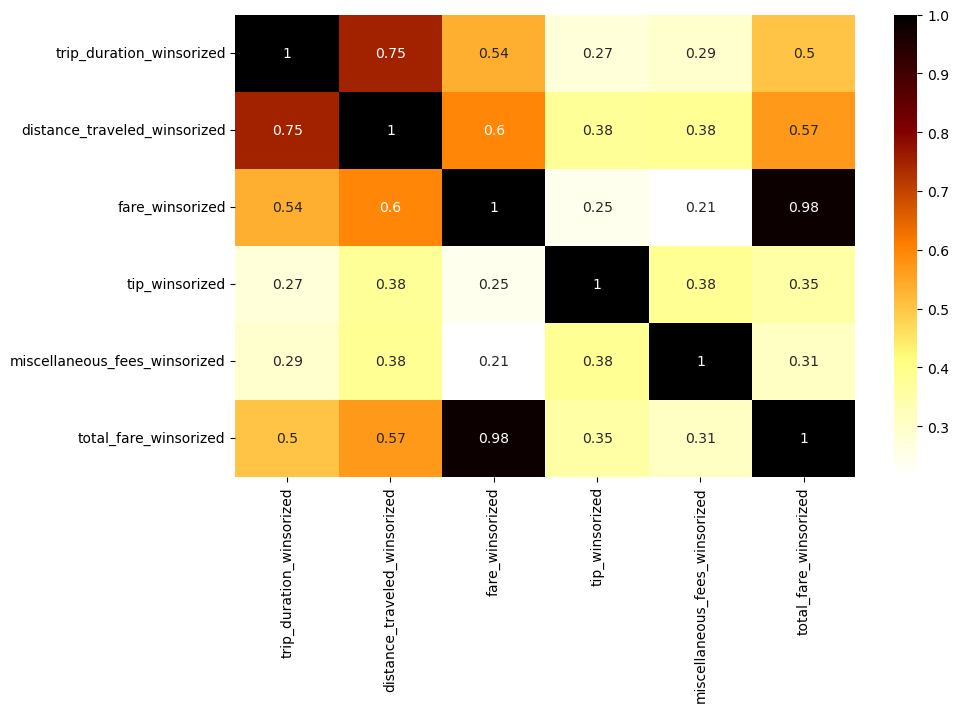

In [79]:
# winsorize data heatmap 

plt.figure(figsize=(10,6))
sns.heatmap(new.loc[:,['trip_duration_winsorized', 'distance_traveled_winsorized'
                    , 'fare_winsorized', 'tip_winsorized',
       'miscellaneous_fees_winsorized', 'total_fare_winsorized']].corr(),annot=True,cmap='afmhot_r')
plt.show()

### Summary of the findings  - IQR Vs Winsorization

* we clearly see that the IQR method win hands down because although we lost some percentage of data in IQR approach however we see that correlation has massively improved.

* On the otherhand, by limiting the data to 99% in winsorization technique, we see that correlation has improved decently.

Therefore we  will be using `wt_outliers` data instead of new dataset created in latter code 

In [80]:
wt_outliers.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,passenger_cat
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0,cab
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0,cab
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1,cab
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0,cab
5,355.0,1.74,1.0,45.00,0,26.625,71.625,1,cab


In [81]:
wt_outliers.num_of_passengers.value_counts()

1.0    158838
Name: num_of_passengers, dtype: int64

In [87]:
# Put the mode for jum_of passengers = 1 
# Trip duration/3600 - hours 
# tip - where the tipis 0 we can create a dummy variable tip and no tip 

wt_outliers['trip_hours'] = wt_outliers['trip_duration']/3600
test['trip_hours'] = test['trip_duration']/3600

In [83]:
wt_outliers.drop(['num_of_passengers','passenger_cat'],axis=1,inplace=True)
test.drop(['num_of_passengers','passenger_cat'],axis=1,inplace=True)

In [85]:
wt_outliers.shape

(158838, 7)

In [89]:
wt_outliers

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied,trip_hours
0,748.0,2.75,75.00,24,6.300,105.300,0,0.207778
1,1187.0,3.43,105.00,24,13.200,142.200,0,0.329722
2,730.0,3.12,71.25,0,26.625,97.875,1,0.202778
4,329.0,2.09,45.00,12,13.200,70.200,0,0.091389
5,355.0,1.74,45.00,0,26.625,71.625,1,0.098611
...,...,...,...,...,...,...,...,...
209667,354.0,1.24,45.00,0,6.000,51.000,0,0.098333
209668,1617.0,8.42,150.00,47,5.800,202.800,0,0.449167
209669,438.0,1.29,48.75,12,34.575,95.325,1,0.121667
209670,571.0,2.82,63.75,0,6.000,69.750,0,0.158611


In [90]:
def tipping(x):
    if x==0:
        return('No_Tip')
    else:
        return('Tip')

In [91]:
wt_outliers['tip_cat'] = wt_outliers.tip.apply(tipping)
test['tip_cat'] = test.tip.apply(tipping)

<AxesSubplot:xlabel='tip_cat', ylabel='fare'>

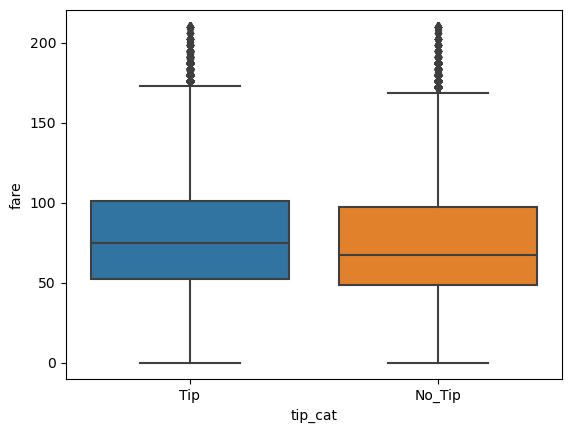

In [93]:
sns.boxplot(x='tip_cat',y='fare',data=wt_outliers)

In [94]:
wt_outliers.head()

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied,trip_hours,tip_cat
0,748.0,2.75,75.00,24,6.300,105.300,0,0.207778,Tip
1,1187.0,3.43,105.00,24,13.200,142.200,0,0.329722,Tip
2,730.0,3.12,71.25,0,26.625,97.875,1,0.202778,No_Tip
4,329.0,2.09,45.00,12,13.200,70.200,0,0.091389,Tip
5,355.0,1.74,45.00,0,26.625,71.625,1,0.098611,No_Tip


In [107]:
# median of tip and misc fees

wt_outliers['travel_cost'] = wt_outliers.loc[:,['tip','miscellaneous_fees']].median(axis=1)
test['travel_cost'] = test.loc[:,['tip','miscellaneous_fees']].median(axis=1)

In [108]:
# Travel cost and distance travelled avg

wt_outliers['dist_travel_cost'] = wt_outliers.loc[:,['travel_cost','distance_traveled']].median(axis=1)
test['dist_travel_cost'] = test.loc[:,['travel_cost','distance_traveled']].median(axis=1)

In [109]:
wt_outliers['magic1'] = wt_outliers['distance_traveled']*wt_outliers['trip_hours']
test['magic1'] = test['distance_traveled']*test['trip_hours']

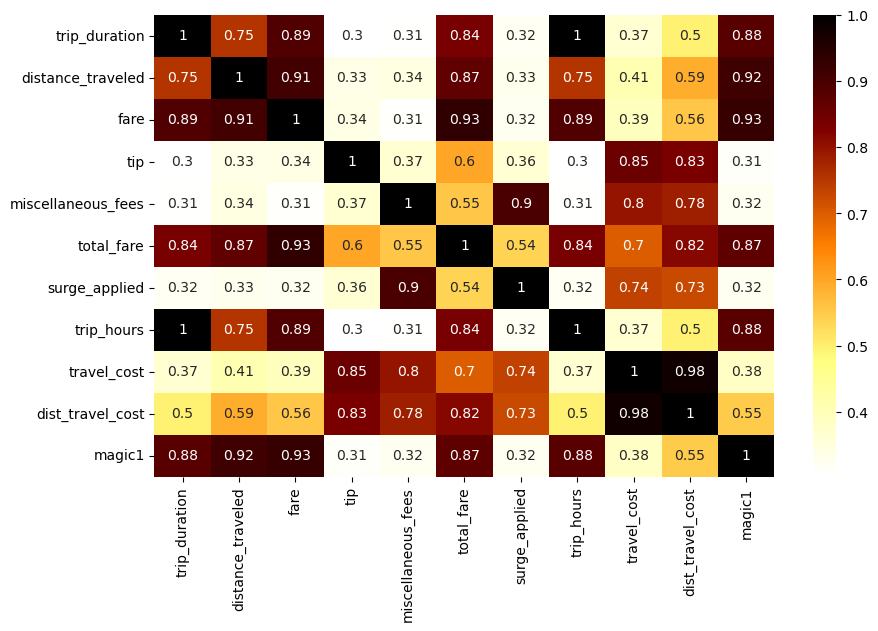

In [105]:
plt.figure(figsize=(10,6))
sns.heatmap(wt_outliers.corr(),annot=True,cmap='afmhot_r')
plt.show()

In [106]:
wt_outliers.head()

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied,trip_hours,tip_cat,travel_cost,dist_travel_cost,magic1
0,748.0,2.75,75.00,24,6.300,105.300,0,0.207778,Tip,15.1500,8.95000,0.571389
1,1187.0,3.43,105.00,24,13.200,142.200,0,0.329722,Tip,18.6000,11.01500,1.130947
2,730.0,3.12,71.25,0,26.625,97.875,1,0.202778,No_Tip,13.3125,8.21625,0.632667
4,329.0,2.09,45.00,12,13.200,70.200,0,0.091389,Tip,12.6000,7.34500,0.191003
5,355.0,1.74,45.00,0,26.625,71.625,1,0.098611,No_Tip,13.3125,7.52625,0.171583


In [110]:
wt_outliers.distance_traveled.describe()

count    158838.000000
mean          3.510818
std           2.315952
min           0.020000
25%           1.830000
50%           2.900000
75%           4.600000
max          11.390000
Name: distance_traveled, dtype: float64

In [ ]:
# 0 - 2.5 : vicinity, 2.5-5 : close, 5-7.5: distant, >10: remote  

In [111]:
def distance(x):
    if x<=2.5:
        return('Vicinity')
    elif x<=5:
        return('close')
    elif x <= 7.5:
        return('Far')
    elif x <= 10 :
        return('Distant')
    else:
        return('Remote')

In [112]:
wt_outliers['distance_cat'] = wt_outliers.distance_traveled.apply(distance)
test['distance_cat'] = test.distance_traveled.apply(distance)

### Statistical Summary 

In [113]:
wt_outliers.select_dtypes(include=np.number).columns

Index(['trip_duration', 'distance_traveled', 'fare', 'tip',
       'miscellaneous_fees', 'total_fare', 'surge_applied', 'trip_hours',
       'travel_cost', 'dist_travel_cost', 'magic1'],
      dtype='object')

In [114]:
num_vars = ['trip_duration', 'distance_traveled', 'tip',
       'miscellaneous_fees', 'total_fare', 'trip_hours',
       'travel_cost', 'dist_travel_cost', 'magic1']

In [115]:
#Ho: That the predictor(s) var and target var is independent of each other.
# This means one does not affect the other . In other words the predictors 
# dont contribute in predicting the target variable 

#Ha : Ho is False. The predictor is a significant feature for the target.

In [116]:
import scipy.stats as stats

for i in num_vars:
    teststats,pvalue = stats.ttest_ind(wt_outliers.loc[:,i],wt_outliers.fare)
    print('Pvalue for', i, 'var is:',np.round(pvalue,4))

Pvalue for trip_duration var is: 0.0
Pvalue for distance_traveled var is: 0.0
Pvalue for tip var is: 0.0
Pvalue for miscellaneous_fees var is: 0.0
Pvalue for total_fare var is: 0.0
Pvalue for trip_hours var is: 0.0
Pvalue for travel_cost var is: 0.0
Pvalue for dist_travel_cost var is: 0.0
Pvalue for magic1 var is: 0.0


In [118]:
wt_outliers.tip_cat.unique() # uptill 2 categories, we can apply Ttest, but
# as we see there are > 2 categpries, thats where we bring anova ...

array(['Tip', 'No_Tip'], dtype=object)

In [120]:
yes = wt_outliers.loc[wt_outliers.tip_cat=='Tip','fare']
no = wt_outliers.loc[wt_outliers.tip_cat=='No_Tip','fare']

# Ho : That the tip_cat has no relation with the fare 
# Ha : Tip_cat has a relation with the fare 
# It means that tip_cat contribution in predicting the fare price

stats.ttest_ind(yes,no)

# conclusion : since the pvalue is less than 0.05, we reject the Ho
# meaning tip_cat is a significant feature for the target variable 

Ttest_indResult(statistic=26.501271631925103, pvalue=2.0365892640545085e-154)

In [121]:
wt_outliers.surge_applied.unique()

array([0, 1], dtype=int64)

In [127]:
surge_yes = wt_outliers.loc[wt_outliers.surge_applied==1,'fare']
surge_no = wt_outliers.loc[wt_outliers.surge_applied==0,'fare']
# Ho : That surge applied has no relation with the fare
# Ha : surge appplied has a relation with fare

stats.ttest_ind(surge_yes,surge_no)

# conclusion : since the pValue is less than 0.05, we reject the Ho
# meaning surge applied is a significant feature for the target variable 

Ttest_indResult(statistic=135.18360882389516, pvalue=0.0)

In [128]:
wt_outliers.distance_cat.unique()

array(['close', 'Vicinity', 'Far', 'Distant', 'Remote'], dtype=object)

In [130]:
import statsmodels.formula.api as sfa

model = sfa.ols('fare~distance_cat',data=wt_outliers).fit()

In [132]:
# anova table

from statsmodels.stats.anova import anova_lm
anova_lm(model)

# conclusion : since the pvalue of ftest is less than alpha 
# we reject the Ho  meaning the dist_cat is a significant feature for the target 

,df,sum_sq,mean_sq,F,PR(>F)
distance_cat,4.0,1.558616e+08,3.896541e+07,131639.15233,0.0
Residual,158833.0,4.701484e+07,2.960017e+02,NaN,NaN


## One hot encoding of categorical var 

In [136]:
# Converting the category into number 

dummytrain = pd.get_dummies(wt_outliers,drop_first=True)
dummytest = pd.get_dummies(test,drop_first=True)



In [137]:
dummytest.head()

,trip_duration,distance_traveled,fare,tip,miscellaneous_fees,total_fare,surge_applied,trip_hours,travel_cost,dist_travel_cost,magic1,tip_cat_Tip,distance_cat_Far,distance_cat_Remote,distance_cat_Vicinity,distance_cat_close
0,1076.0,4.18,0,0,13.500,0,0,0.298889,6.7500,5.46500,1.249356,0,0,0,0,1
1,429.0,1.48,0,0,13.500,0,0,0.119167,6.7500,4.11500,0.176367,0,0,0,1,0
2,856.0,4.15,0,24,6.000,0,0,0.237778,15.0000,9.57500,0.986778,1,0,0,0,1
3,622.0,3.22,0,15,5.625,0,0,0.172778,10.3125,6.76625,0.556344,1,0,0,0,1
4,507.0,3.98,0,0,2.250,0,0,0.140833,1.1250,2.55250,0.560517,0,0,0,0,1


In [141]:
X = dummytrain.drop(['fare','total_fare','trip_duration'],axis=1)
y = dummytrain.fare

dummytest.drop(['fare','total_fare','trip_duration'],axis=1,inplace=True)

In [142]:
X.head()

,distance_traveled,tip,miscellaneous_fees,surge_applied,trip_hours,travel_cost,dist_travel_cost,magic1,tip_cat_Tip,distance_cat_Far,distance_cat_Remote,distance_cat_Vicinity,distance_cat_close
0,2.75,24,6.300,0,0.207778,15.1500,8.95000,0.571389,1,0,0,0,1
1,3.43,24,13.200,0,0.329722,18.6000,11.01500,1.130947,1,0,0,0,1
2,3.12,0,26.625,1,0.202778,13.3125,8.21625,0.632667,0,0,0,0,1
4,2.09,12,13.200,0,0.091389,12.6000,7.34500,0.191003,1,0,0,1,0
5,1.74,0,26.625,1,0.098611,13.3125,7.52625,0.171583,0,0,0,1,0


## Model Building 

* Base Model = Avg 
* Linear Regression Model
* Random Forest Model 
* Gradient Boosting 
* XGboost 

In [145]:
# LR model 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle = True, random_state=42)
lr = LinearRegression()

In [148]:
# 5 CV LR model 


pred = []

for train_index, test_index in kfold.split(X,y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index] # Do the direct prediction on dummy test
    pred.append(lr.fit(xtrain,ytrain).predict(dummytest))

In [149]:
pd.DataFrame(pred).T

,0,1,2,3,4
0,96.318317,96.358438,96.470978,96.289955,96.426567
1,48.611866,48.576856,48.634950,48.629699,48.555619
2,90.317705,90.385723,90.301668,90.380028,90.314064
3,72.198656,72.207022,72.117781,72.211590,72.129632
4,73.961283,73.988027,73.819040,73.964145,73.918352
...,...,...,...,...,...
89856,53.141304,53.153494,53.218535,53.142137,53.170734
89857,59.491288,59.461558,59.503973,59.468535,59.431884
89858,55.485328,55.475483,55.486015,55.465099,55.520913
89859,90.428355,90.498961,90.528294,90.490794,90.504690


In [150]:
test['fare'] = np.abs(pd.DataFrame(pred).T.mean(axis=1))

In [151]:
tota_fare = test['fare']+test['tip']+test['miscellaneous_fees']

# submission file

submission = pd.DataFrame({'total_fare':tota_fare})

In [152]:
# Export it outside

submission.to_csv('LRModel.csv',index=False) # RMSE

In [153]:
cd


C:\Users\Sanat


In [154]:
# Random Forest model 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rf = RandomForestRegressor()

pred_rf = []
for train_index, test_index in kfold.split(X,y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_rf.append(rf.fit(xtrain,ytrain).predict(dummytest))

In [158]:
# GBM 
gbm = GradientBoostingRegressor()
pred_gbm = []
for train_index, test_index in kfold.split(X,y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_gbm.append(gbm.fit(xtrain,ytrain).predict(dummytest))

In [159]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
pred_xgb = []

for train_index, test_index in kfold.split(X,y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_xgb.append(xgb.fit(xtrain,ytrain).predict(dummytest))



In [160]:
from  lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
pred_lgbm = []
for train_index, test_index in kfold.split(X,y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_lgbm.append(lgbm.fit(xtrain,ytrain).predict(dummytest))

In [173]:
# Submission of Random forest model 

total = np.abs(pd.DataFrame(pred_rf).T.mean(axis=1))
test['fare'] = total
total_fare = test['fare']+test['tip']+test['miscellaneous_fees']
submission = pd.DataFrame({'total_fare':total_fare})

In [180]:
# export it outside 
submission.to_csv('RandomForest.csv',index=False) # RMSE


In [163]:
# Gradient Boosting 
total = np.abs(pd.DataFrame(pred_gbm).T.mean(axis=1))
test['fare'] = total
total_fare = test['fare']+test['tip']+test['miscellaneous_fees']
submission = pd.DataFrame({'total_fare':total_fare})

In [164]:
submission.to_csv('Gradientboosting.csv',index=False) # RMSE


In [165]:
# Xtreme Gradient Boosting 
total = np.abs(pd.DataFrame(pred_xgb).T.mean(axis=1))
test['fare'] = total
total_fare = test['fare']+test['tip']+test['miscellaneous_fees']
submission = pd.DataFrame({'total_fare':total_fare})

In [166]:
submission.to_csv('XGB.csv',index=False) # RMSE


In [167]:
# LGB 
total = np.abs(pd.DataFrame(pred_lgbm).T.mean(axis=1))
test['fare'] = total
total_fare = test['fare']+test['tip']+test['miscellaneous_fees']
submission = pd.DataFrame({'total_fare':total_fare})

In [168]:
submission.to_csv('lgbm.csv',index=False) # RMSE


In [169]:
cd

C:\Users\Sanat


## Tuning of parameters of XGB Regressor 

In [170]:
from sklearn.model_selection import GridSearchCV

In [172]:
xgb = XGBRegressor()
params = {'learning_rate':[0.1,0.01,0.001,0.5],
         'max_depth':[3,5,7,8],
         'n_estimator':[100,300,500],
         'subsample':[0.6,0.8,1]}

grid = GridSearchCV(estimator=xgb,param_grid=params,cv=5,
                    scoring='neg_mean_squared_log_error')

In [ ]:
# Fit the grid 

grid.fit(X,y)
print('Best Parameters ',grid.best_params_)